# Exercise 4.1



## Assignment

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

Since we are working with reduced units we need to convert the previous expression describing the pressure in the proper unit frame by using the following conversions: $$P^{*}=P\frac{\sigma^3}{\epsilon},\quad T^*=k_{B}\frac{T}{\epsilon}, \quad V^*=\frac{V}{\epsilon}, \quad\rho^*=\rho\sigma^3, \quad r^*=\frac{r}{\sigma} \quad t^{*} = t \cdot \sqrt{\frac{\epsilon}{\sigma^{2}m}}$$ obtaining:

$$ P^* = \rho^{*}T^{*}+ \frac{1}{3V^*} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48 \left[ \left(\frac{1}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{1}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

Once I have retrieved the expression for the pressure it is possible to upgrade my code following the track marked for measuring the other physical quantities.

# Exercise 4.2



## Assignment

By means of your upgraded code, perform MD simulations via a Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### Warning: Equilibration is needed!

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. Perform your solid/liquid phase MD simulations by re-starting them after such equilibration time.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Equilibration

The starting configuration of the simulation is a crystal FCC lattice: this simple initialization solves the problem of avoiding compenetration between out particles. However, we need a first relaxation time to allow our system to thermalize and reach the desired thermodynamic phase. Depending on the particular phase, this may take more time and result in adjustments in terms of Kinetic energy of the particles and therefore the temperature of the system.

### Liquid

In order to infer the proper input parameters I start by simulating the system with different temperatures and observe, once the system reaches its own equilibrium, the final temperature.
The following figure is obtained through 10 different simulations with starting temperature ranging from $1.9$ to $2.0$ (in reduced units); the other parameters are the ones given for the liquid phase and remained fixed.
Every simulation is carryed out with 200 blocks and 500 throws in each block ($10^5$ steps per input temp). In this part of the procedure it is not mandatory to use the blocking average technique but using small blocks helped cutting out fluctuations and getting a more clear picture of what was happening to my system.

*Please carefully read the `Readme.md` section on Github in order to understand how i produced this vast quantity of data and how I launched in sequence all the simulations.*

In [3]:
import glob

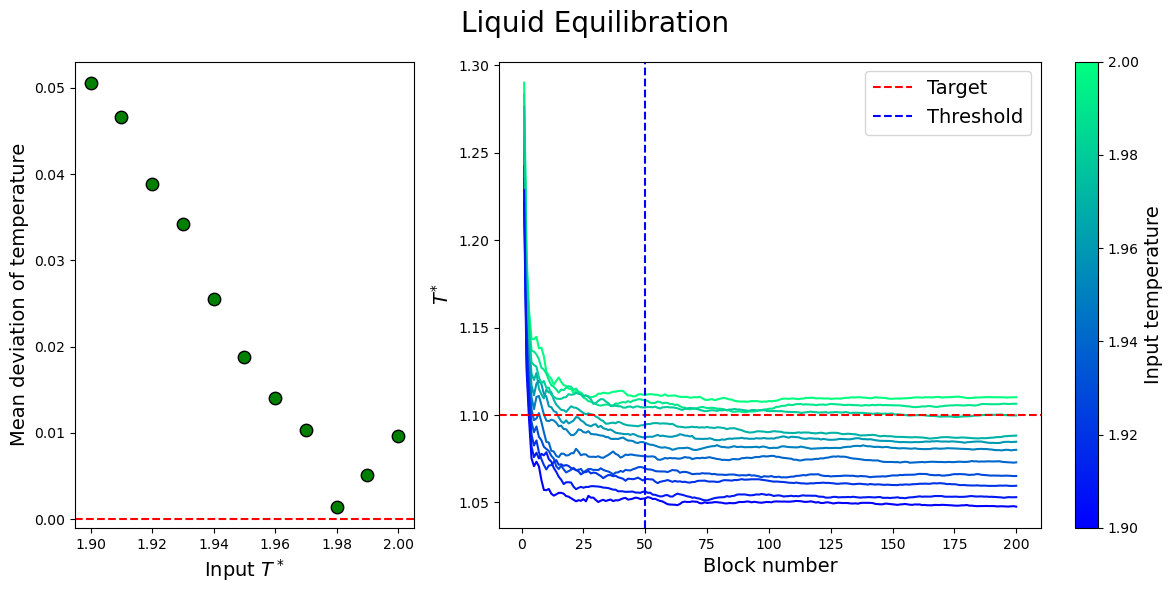

In [4]:
# Get a list of all the files that match the pattern temp*.dat in the folder containg this first simulation files
file_list = glob.glob("4.1/Liquid/Equilibration/output_temp*.dat")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 2]})
import matplotlib.cm as cm
norm = plt.Normalize(vmin=1.9, vmax=2.)
cmap = cm.ScalarMappable(norm=norm, cmap='winter')

for file in file_list:
    temp = np.loadtxt(file, usecols=(0, 2))
    file = file.replace('4.1/Liquid/Equilibration/output_temp','')
    file = file.replace('.dat','')
    ax1.scatter(round(float(file),2), abs(np.mean((temp[50:,1]-1.1)[1:])), c='green', edgecolor='black', s = 80)
    ax2.plot(temp[:,0], temp[:,1], color=cmap.to_rgba(round(float(file),2)))

ax1.set_ylabel('Mean deviation of temperature', fontsize=14)
ax1.set_xlabel('Input $T^*$', fontsize=14)
ax1.axhline(0, c='red', ls='--')

cbar = fig.colorbar(cmap)
cbar.set_label('Input temperature', fontsize=14)
ax2.set_ylabel('$T^{*}$', fontsize=14)
ax2.set_xlabel('Block number', fontsize=14)
ax2.axhline(1.1, c='red', ls='--', label='Target')
ax2.axvline(50, c='blue', ls='--', label ='Threshold')
ax2.legend(bbox_to_anchor =(1, 1), fontsize=14)

fig.suptitle('Liquid Equilibration', fontsize=20)
plt.tight_layout()
plt.show()




On the **left** it is shown the absolute value of the average of the deviation to the target temperature, $$|<T-T_{target}>|$$ where $T$ is the one measured in the system after the equilibration phase.

The mean is obtained discarding the first 50 blocks in which I observed that the system arranges itself towards equilibrium (the vertical dashed blue line), results are shown as a function of the input temperature of the simulation $T^{*}$.

On the **right** it is shown a plot representing the measured temperaure per block of each simulation. Although it may present itself as a bit confusing, this second plot gives an idea of how, starting from different input temperatures, the system thermalizes differently.

From the previous, it is quite clear that $T^{*} = 1.98$ is the best choice for the simulation.

The same procedure could be applied to the other phases:

### Solid

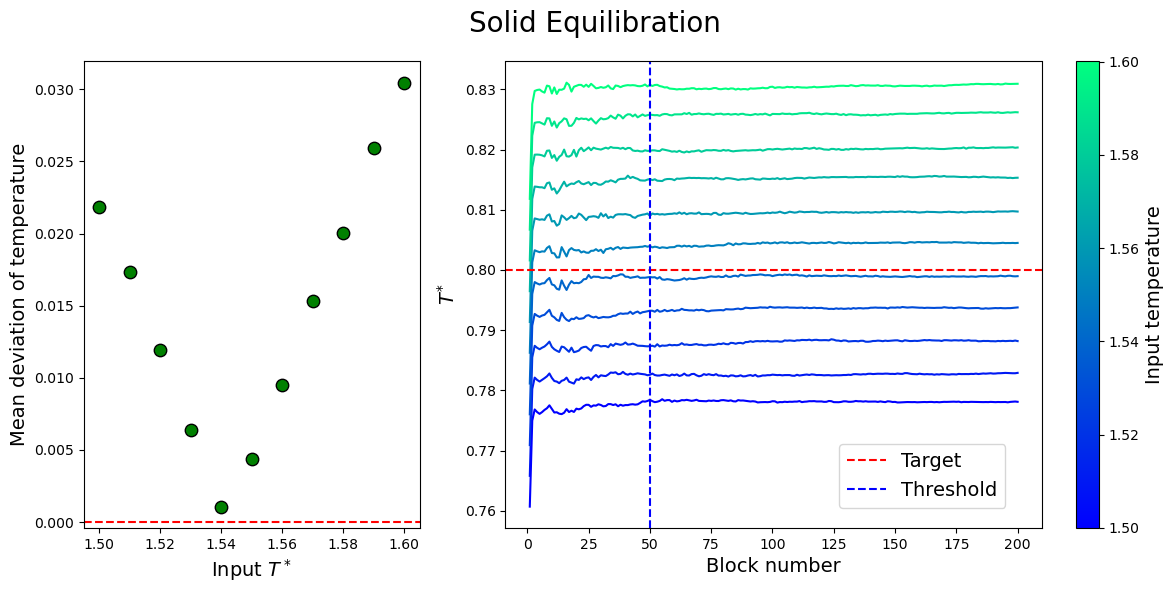

In [5]:
# Get a list of all the files that match the pattern temp*.dat in the folder containg this first simulation files
file_list = glob.glob("4.1/Solid/Equilibration/output_temp*.dat")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 2]})
import matplotlib.cm as cm
norm = plt.Normalize(vmin=1.5, vmax=1.6)
cmap = cm.ScalarMappable(norm=norm, cmap='winter')

for file in file_list:
    temp = np.loadtxt(file, usecols=(0, 2))
    file = file.replace('4.1/Solid/Equilibration/output_temp','')
    file = file.replace('.dat','')
    ax1.scatter(round(float(file),2), abs(np.mean((temp[50:,1]-0.8)[1:])), c='green', edgecolor='black', s = 80)
    ax2.plot(temp[:,0], temp[:,1], color=cmap.to_rgba(round(float(file),2)))

ax1.set_ylabel('Mean deviation of temperature', fontsize=14)
ax1.set_xlabel('Input $T^*$', fontsize=14)
ax1.axhline(0, c='red', ls='--')

cbar = fig.colorbar(cmap)
cbar.set_label('Input temperature', fontsize=14)
ax2.set_ylabel('$T^{*}$', fontsize=14)
ax2.set_xlabel('Block number', fontsize=14)
ax2.axhline(0.8, c='red', ls='--', label='Target')
ax2.axvline(50, c='blue', ls='--', label ='Threshold')
ax2.legend(bbox_to_anchor =(0.95, 0.2), fontsize=14)

fig.suptitle('Solid Equilibration', fontsize=20)
plt.tight_layout()
plt.show()

Here the best choice, according to our procedure, is $T^{*}=1.54$

### Gas

For this phase, by means of this kind of analysis, I opted for 800 blocks in order to reach a proper thermalization 

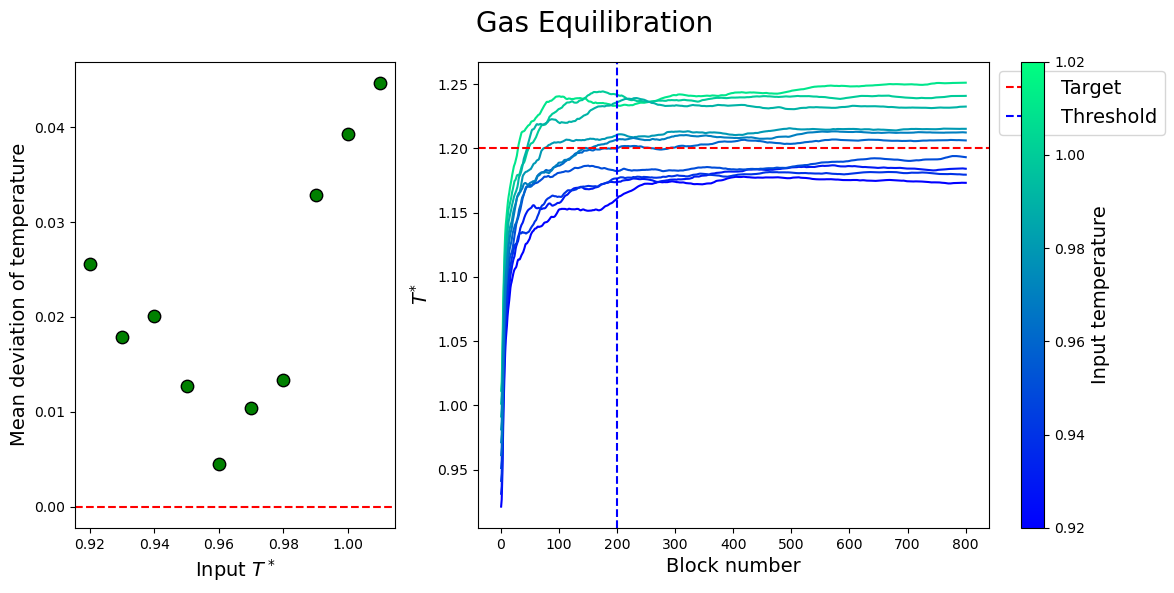

In [6]:
# Get a list of all the files that match the pattern temp*.dat in the folder containg this first simulation files
file_list = glob.glob("4.1/Gas/Equilibration/output_temp*.dat")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 2]})
import matplotlib.cm as cm
norm = plt.Normalize(vmin=.92, vmax=1.02)
cmap = cm.ScalarMappable(norm=norm, cmap='winter')

for file in file_list:
    temp = np.loadtxt(file, usecols=(0, 2))
    file = file.replace('4.1/Gas/Equilibration/output_temp','')
    file = file.replace('.dat','')
    ax1.scatter(round(float(file),2), abs(np.mean((temp[200:,1]-1.2)[1:])), c='green', edgecolor='black', s = 80)
    ax2.plot(temp[:,0], temp[:,1], color=cmap.to_rgba(round(float(file),2)))

ax1.set_ylabel('Mean deviation of temperature', fontsize=14)
ax1.set_xlabel('Input $T^*$', fontsize=14)
ax1.axhline(0, c='red', ls='--')

cbar = fig.colorbar(cmap)
cbar.set_label('Input temperature', fontsize=14)
ax2.set_ylabel('$T^{*}$', fontsize=14)
ax2.set_xlabel('Block number', fontsize=14)
ax2.axhline(1.2, c='red', ls='--', label='Target')
ax2.axvline(200, c='blue', ls='--', label ='Threshold')
ax2.legend(bbox_to_anchor =(1, 1), fontsize=14)

fig.suptitle('Gas Equilibration', fontsize=20)
plt.tight_layout()
plt.show()

The input temperature taken for the gas phase is $T^{*}=0.96$

## Simulation

Now that we understood the proper input temperatures for each phase, I proceed by thermalizing the system starting from the input temperature, printing the result configuration and repeating (`restart` = 1 in `input.in`) the simulation by restarting with the final configuration but the proper temperature. This is done for each phase.

In the termalization part, the number of blocks used varies according to the intrinsic time needed for the phase to reach the equilibrium while in the second part every simulation is performed with 50 blocks containg 2000 throws each.

### Temperatures

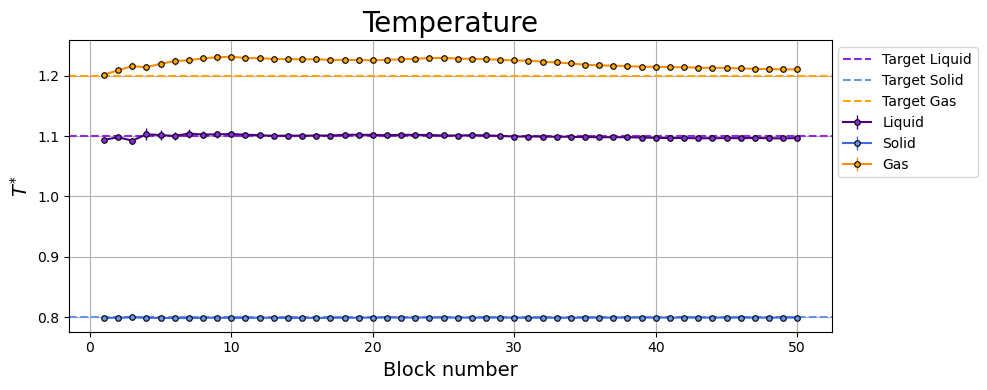

In [28]:
fig = plt.figure(figsize=((10,4)))
temp = np.loadtxt('4.1/Liquid/output_temp.dat', usecols=(0, 2))
temp_err = np.loadtxt('4.1/Liquid/output_temp.dat', usecols=(0,3))
plt.axhline(1.1, c='blueviolet', ls='--', label='Target Liquid')
plt.errorbar(temp[:,0],temp[:,1], yerr=temp_err[:,1], marker='o',ms=4,mec='black',mfc='blueviolet',mew=0.8, label= 'Liquid', color = 'indigo', lw =1.5, elinewidth=1)

temp = np.loadtxt('4.1/Solid/output_temp.dat', usecols=(0, 2))
temp_err = np.loadtxt('4.1/Solid/output_temp.dat', usecols=(0,3))
plt.axhline(0.8, c='cornflowerblue', ls='--', label='Target Solid')
plt.errorbar(temp[:,0],temp[:,1], yerr=temp_err[:,1], marker='o',ms=4,mec='black',mfc='cornflowerblue',mew=0.8, label= 'Solid', color = 'royalblue', lw =1.5, elinewidth=1)

temp = np.loadtxt('4.1/Gas/output_temp.dat', usecols=(0, 2))
temp_err = np.loadtxt('4.1/Gas/output_temp.dat', usecols=(0,3))
plt.axhline(1.2, c='orange', ls='--', label='Target Gas')
plt.errorbar(temp[:,0],temp[:,1], yerr=temp_err[:,1], marker='o',ms=4,mec='black',mfc='orange',mew=0.8, label= 'Gas', color = 'darkorange', lw =1.5, elinewidth=1)

plt.xlabel('Block number', fontsize=14)
plt.ylabel('$T^{*}$', fontsize=14)
plt.title('Temperature', fontsize=20)
plt.legend(bbox_to_anchor =(1.2, 1))
plt.grid()
plt.tight_layout()
plt.show()

### Kinetic energy

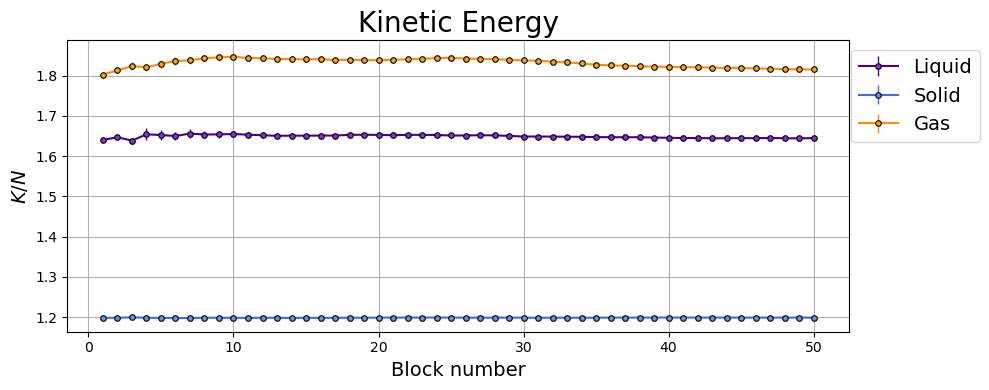

In [29]:
fig = plt.figure(figsize=((10,4)))
temp = np.loadtxt('4.1/Liquid/output_ekin.dat', usecols=(0, 2))
temp_err = np.loadtxt('4.1/Liquid/output_ekin.dat', usecols=(0,3))
plt.errorbar(temp[:,0],temp[:,1], yerr=temp_err[:,1], marker='o',ms=4,mec='black',mfc='blueviolet',mew=0.8, label= 'Liquid', color = 'indigo', lw =1.5, elinewidth=1)

temp = np.loadtxt('4.1/Solid/output_ekin.dat', usecols=(0, 2))
temp_err = np.loadtxt('4.1/Solid/output_ekin.dat', usecols=(0,3))
plt.errorbar(temp[:,0],temp[:,1], yerr=temp_err[:,1], marker='o',ms=4,mec='black',mfc='cornflowerblue',mew=0.8, label= 'Solid', color = 'royalblue', lw =1.5, elinewidth=1)

temp = np.loadtxt('4.1/Gas/output_ekin.dat', usecols=(0, 2))
temp_err = np.loadtxt('4.1/Gas/output_ekin.dat', usecols=(0,3))
plt.errorbar(temp[:,0],temp[:,1], yerr=temp_err[:,1], marker='o',ms=4,mec='black',mfc='orange',mew=0.8, label= 'Gas', color = 'darkorange', lw =1.5, elinewidth=1)

plt.xlabel('Block number', fontsize=14)
plt.ylabel('$K/N$', fontsize=14)
plt.title('Kinetic Energy', fontsize=20)
plt.legend(bbox_to_anchor =(.99, 1),fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

### Pressure

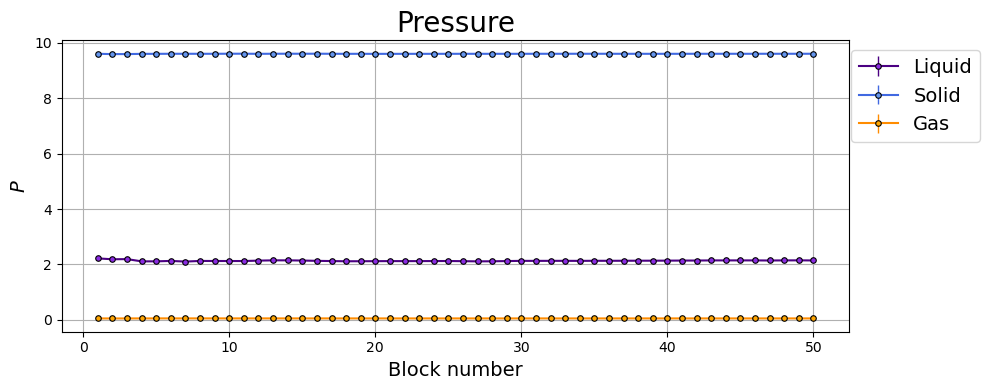

In [30]:
fig = plt.figure(figsize=((10,4)))
temp = np.loadtxt('4.1/Liquid/output_press.dat', usecols=(0, 2))
temp_err = np.loadtxt('4.1/Liquid/output_press.dat', usecols=(0,3))
plt.errorbar(temp[:,0],temp[:,1], yerr=temp_err[:,1], marker='o',ms=4,mec='black',mfc='blueviolet',mew=0.8, label= 'Liquid', color = 'indigo', lw =1.5, elinewidth=1)

temp = np.loadtxt('4.1/Solid/output_press.dat', usecols=(0, 2))
temp_err = np.loadtxt('4.1/Solid/output_press.dat', usecols=(0,3))
plt.errorbar(temp[:,0],temp[:,1], yerr=temp_err[:,1], marker='o',ms=4,mec='black',mfc='cornflowerblue',mew=0.8, label= 'Solid', color = 'royalblue', lw =1.5, elinewidth=1)

temp = np.loadtxt('4.1/Gas/output_press.dat', usecols=(0, 2))
temp_err = np.loadtxt('4.1/Gas/output_press.dat', usecols=(0,3))
plt.errorbar(temp[:,0],temp[:,1], yerr=temp_err[:,1], marker='o',ms=4,mec='black',mfc='orange',mew=0.8, label= 'Gas', color = 'darkorange', lw =1.5, elinewidth=1)

plt.xlabel('Block number', fontsize=14)
plt.ylabel('$P$', fontsize=14)
plt.title('Pressure', fontsize=20)
plt.legend(bbox_to_anchor =(.99, 1),fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

### Potential energy

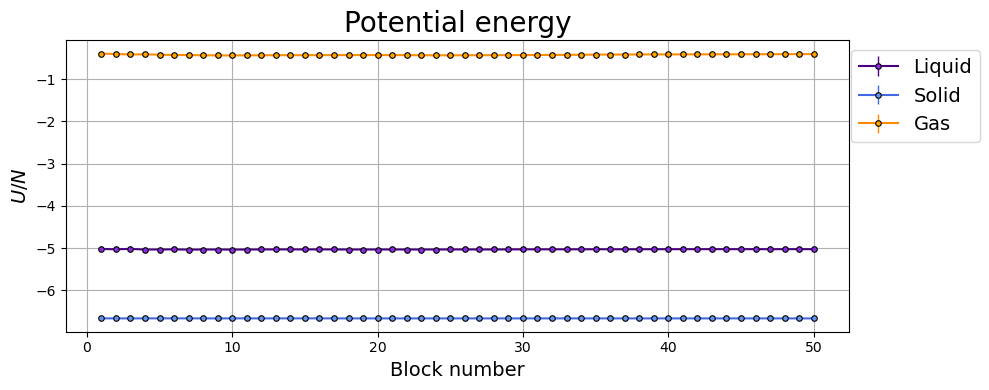

In [31]:
fig = plt.figure(figsize=((10,4)))
temp = np.loadtxt('4.1/Liquid/output_epot.dat', usecols=(0, 2))
temp_err = np.loadtxt('4.1/Liquid/output_epot.dat', usecols=(0,3))
plt.errorbar(temp[:,0],temp[:,1], yerr=temp_err[:,1], marker='o',ms=4,mec='black',mfc='blueviolet',mew=0.8, label= 'Liquid', color = 'indigo', lw =1.5, elinewidth=1)

temp = np.loadtxt('4.1/Solid/output_epot.dat', usecols=(0, 2))
temp_err = np.loadtxt('4.1/Solid/output_epot.dat', usecols=(0,3))
plt.errorbar(temp[:,0],temp[:,1], yerr=temp_err[:,1], marker='o',ms=4,mec='black',mfc='cornflowerblue',mew=0.8, label= 'Solid', color = 'royalblue', lw =1.5, elinewidth=1)

temp = np.loadtxt('4.1/Gas/output_epot.dat', usecols=(0, 2))
temp_err = np.loadtxt('4.1/Gas/output_epot.dat', usecols=(0,3))
plt.errorbar(temp[:,0],temp[:,1], yerr=temp_err[:,1], marker='o',ms=4,mec='black',mfc='orange',mew=0.8, label= 'Gas', color = 'darkorange', lw =1.5, elinewidth=1)

plt.xlabel('Block number', fontsize=14)
plt.ylabel('$U/N$', fontsize=14)
plt.title('Potential energy', fontsize=20)
plt.legend(bbox_to_anchor =(.99, 1),fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

### Total (internal) energy

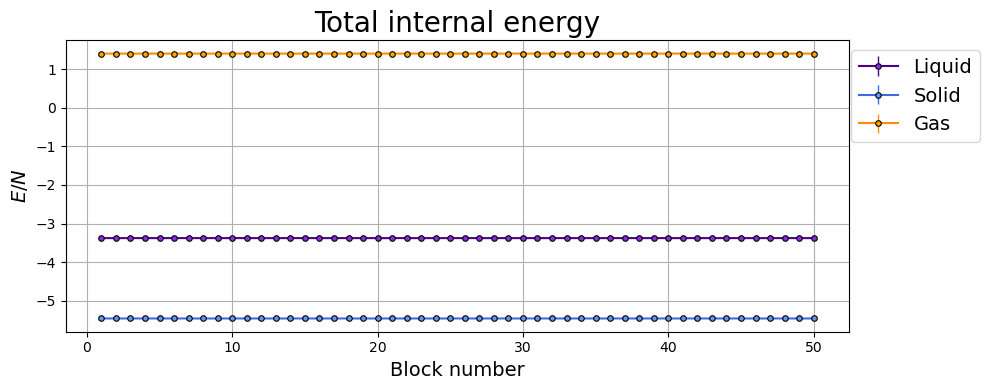

In [32]:
fig = plt.figure(figsize=((10,4)))
temp = np.loadtxt('4.1/Liquid/output_etot.dat', usecols=(0, 2))
temp_err = np.loadtxt('4.1/Liquid/output_etot.dat', usecols=(0,3))
plt.errorbar(temp[:,0],temp[:,1], yerr=temp_err[:,1], marker='o',ms=4,mec='black',mfc='blueviolet',mew=0.8, label= 'Liquid', color = 'indigo', lw =1.5, elinewidth=1)

temp = np.loadtxt('4.1/Solid/output_etot.dat', usecols=(0, 2))
temp_err = np.loadtxt('4.1/Solid/output_etot.dat', usecols=(0,3))
plt.errorbar(temp[:,0],temp[:,1], yerr=temp_err[:,1], marker='o',ms=4,mec='black',mfc='cornflowerblue',mew=0.8, label= 'Solid', color = 'royalblue', lw =1.5, elinewidth=1)

temp = np.loadtxt('4.1/Gas/output_etot.dat', usecols=(0, 2))
temp_err = np.loadtxt('4.1/Gas/output_etot.dat', usecols=(0,3))
plt.errorbar(temp[:,0],temp[:,1], yerr=temp_err[:,1], marker='o',ms=4,mec='black',mfc='orange',mew=0.8, label= 'Gas', color = 'darkorange', lw =1.5, elinewidth=1)

plt.xlabel('Block number', fontsize=14)
plt.ylabel('$E/N$', fontsize=14)
plt.title('Total internal energy', fontsize=20)
plt.legend(bbox_to_anchor =(.99, 1),fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()